In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lhcb_data = pd.read_csv('Data/popularity-728days.csv')
lhcb_data.irow(range(0,3))

,Name,Configuration,ProcessingPass,FileType,Type,Creation-week,NbLFN,LFNSize,NbDisk,DiskSize,...,95,96,97,98,99,100,101,102,103,104
0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,/LHCb/Collision10,/RealData/Reco08-MINBIAS-FIRST-14-NB/Stripping12d,MINIBIAS.DST,1,104591,67,0.317900,134,0.635799,...,12687,12687,12687,12687,12687,12687,12687,12687,12687,12687
1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,/LHCb/Collision10,/RealData/Reco08/Stripping14,BHADRON.DST,1,104607,227,0.649204,980,2.819260,...,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631
2,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,/LHCb/Collision10,/RealData/Reco08/Stripping14,CALIBRATION.DST,1,104607,355,1.370105,355,1.370105,...,0,0,0,474,708,708,708,708,708,708


In [3]:
#test_data = lhcb_data.irow(np.random.choice(lhcb_data.index, 1000))
test_data = lhcb_data
test_data.shape

(10368, 124)

In [4]:
risk_matrix = np.array([[0, 1],
                        [1000, 0]])

In [5]:
from datapop.LHCb import RecommendationSystem
rs = RecommendationSystem(forecast_horizont=26, class_abs_thresholds=1, risk_matrix=risk_matrix)
report = rs.report(data=test_data)

KFold prediction using folds column
KFold prediction using folds column


In [6]:
report.irow(range(0,5))

,ID,Proba_Type_0,Proba_Type_1,Risk_Type_0,Risk_Type_1,Recommended_Type
0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,5.988962e-05,0.9999401,999.9401,5.988962e-05,1
1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.9393447,0.0606553,60.6553,0.9393447,1
2,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.9903628,0.009637165,9.637165,0.9903628,1
3,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.001167791,0.9988322,998.8322,0.001167791,1
4,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.985771,0.01422903,14.22903,0.985771,1


#Simulation

In [7]:
from datapop.LHCb import LHCbSimulator
from datapop.LHCb import RecommendationSystem

risk_matrix = np.array([[0, 1],
                        [1000, 0]])

rs = RecommendationSystem(forecast_horizont=26, class_abs_thresholds=1, risk_matrix=risk_matrix)

sim = LHCbSimulator(data=test_data,\
                   begin=52, step=10,\
                   recommendation_system=rs)

simulation_report = sim.simulation_report()

KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column


/Users/mikhail91/Documents/Github/DataPopularity/datapop/datapop/core/Simulator.py:57: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if forecast_horizont!=None and class_abs_thresholds!=None:


In [8]:
simulation_report.irow(range(0,3))

,Periods,ROC_AUC,Mistakes,Recommended_total_disk_size,True_total_disk_size
0,52,0.742909,18,0.991480,0.993184
1,62,0.731351,17,0.964978,0.966544
2,72,0.717696,25,0.954885,0.966894


In [9]:
from datapop.LHCb import LRU
lru = LRU(forecast_horizont=26, class_abs_thresholds=1)

sim_lru = LHCbSimulator(data=test_data,\
                   begin=52, step=10,\
                   recommendation_system=lru)

simulation_lru = sim_lru.simulation_report()

In [10]:
simulation_lru.irow(range(0,3))

,Periods,ROC_AUC,Mistakes,Recommended_total_disk_size,True_total_disk_size
0,52,0.676514,121,0.870430,0.89928
1,62,0.659304,139,0.847141,0.87856
2,72,0.671781,157,0.829835,0.85179


In [11]:
from datapop.LHCb import Origin
origin = Origin(forecast_horizont=26, class_abs_thresholds=1)

sim_origin = LHCbSimulator(data=test_data,\
                   begin=52, step=10,\
                   recommendation_system=origin)

simulation_origin = sim_origin.simulation_report()

In [12]:
simulation_origin.irow(range(0,3))

,Periods,ROC_AUC,Mistakes,Recommended_total_disk_size,True_total_disk_size
0,52,0.5,0,1,1
1,62,0.5,0,1,1
2,72,0.5,0,1,1


In [26]:
from datapop.LHCb import LHCbSimulator
from datapop.LHCb import KernelRegression
kernel = KernelRegression(forecast_horizont=26, class_abs_thresholds=0.01)

sim_kr = LHCbSimulator(data=test_data,\
                   begin=52, step=10,\
                   recommendation_system=kernel)

simulation_kr = sim_kr.simulation_report()

In [27]:
simulation_kr.irow(range(0,3))

,Periods,ROC_AUC,Mistakes,Recommended_total_disk_size,True_total_disk_size
0,52,0.628182,247,0.863915,0.906801
1,62,0.647254,341,0.817649,0.855573
2,72,0.651402,450,0.733533,0.835178


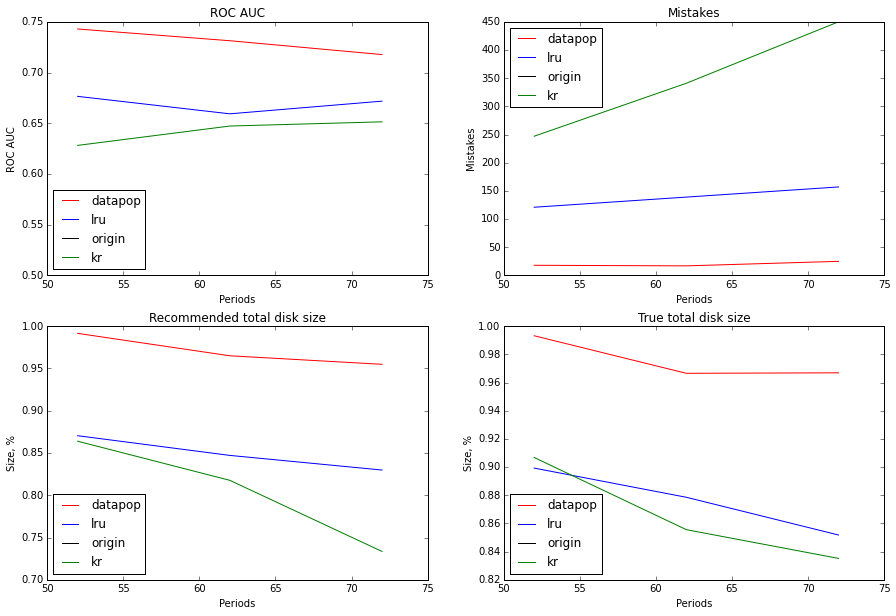

In [28]:
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
dp = simulation_report
lr = simulation_lru
orig = simulation_origin
kr = simulation_kr
plt.plot(dp.Periods, dp.ROC_AUC, label='datapop', c='r')
plt.plot(lr.Periods, lr.ROC_AUC, label='lru', c='b')
plt.plot(orig.Periods, orig.ROC_AUC, label='origin', c='0')
plt.plot(kr.Periods, kr.ROC_AUC, label='kr', c='g')
plt.title('ROC AUC')
plt.xlabel('Periods')
plt.ylabel('ROC AUC')
plt.legend(loc='best')

plt.subplot(2,2,2)
plt.plot(dp.Periods, dp.Mistakes, label='datapop', c='r')
plt.plot(lr.Periods, lr.Mistakes, label='lru', c='b')
plt.plot(orig.Periods, orig.Mistakes, label='origin', c='0')
plt.plot(kr.Periods, kr.Mistakes, label='kr', c='g')
plt.title('Mistakes')
plt.xlabel('Periods')
plt.ylabel('Mistakes')
plt.legend(loc='best')

plt.subplot(2,2,3)
plt.plot(dp.Periods, dp.Recommended_total_disk_size, label='datapop', c='r')
plt.plot(lr.Periods, lr.Recommended_total_disk_size, label='lru', c='b')
plt.plot(orig.Periods, orig.Recommended_total_disk_size, label='origin', c='0')
plt.plot(kr.Periods, kr.Recommended_total_disk_size, label='kr', c='g')
plt.title('Recommended total disk size')
plt.xlabel('Periods')
plt.ylabel('Size, %')
plt.legend(loc='best')

plt.subplot(2,2,4)
plt.plot(dp.Periods, dp.True_total_disk_size, label='datapop', c='r')
plt.plot(lr.Periods, lr.True_total_disk_size, label='lru', c='b')
plt.plot(orig.Periods, orig.True_total_disk_size, label='origin', c='0')
plt.plot(kr.Periods, kr.True_total_disk_size, label='kr', c='g')
plt.title('True total disk size')
plt.xlabel('Periods')
plt.ylabel('Size, %')
plt.legend(loc='best')